# хоёр хэмжээст дата

**Англи хэл ба тооны шалгалтын оноог ашиглан 1 сурагчид 2 хичээлийн оноо оногдох 2 хэмжээст датаны хувьд авч үзнэ.**

In [4]:
import numpy as np
import pandas as pd

%precision 3
pd.set_option('precision', 3)
# үр дүнг гаргахад бутархайн эхний 3 оронгоор таслана.

In [5]:
df = pd.read_csv('data/ch2_scores_em.csv',
                 index_col='student number')

In [6]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores,
                          'mathematics':ma_scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='student'))
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


## Хоёр датаны хамаарлыг илэрхийлэх тоон үзүүлэлт

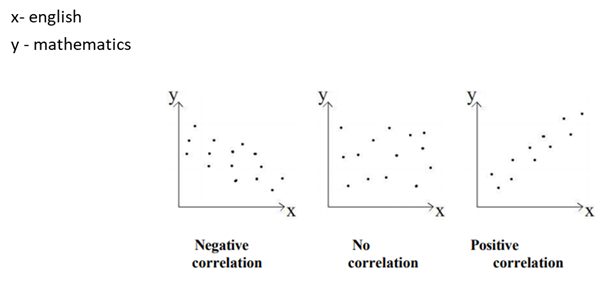

<AxesSubplot:xlabel='english', ylabel='mathematics'>

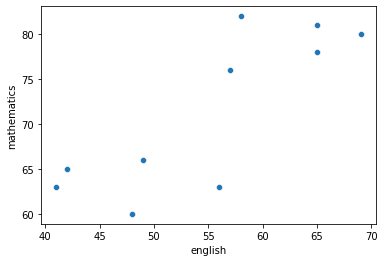

In [7]:
import seaborn as sns
sns.scatterplot(data=scores_df, x="english", y= 'mathematics')
# англи хэлний шалгалтын оноо өндөр сурагч байх тусам математикийн шалглтын оноо өндөр байна
# хоорондоо эерэг хамааралттай гэж үзэж болно.

### Covariance

Ковариац нь хоёр хувьсагчийн хоорондын харилцааны чиглэлийг хэмждэг. Эерэг ковариац гэдэг нь хоёр хувьсагч нэгэн зэрэг өндөр эсвэл бага байх хандлагатай байна гэсэн үг. Сөрөг ковариац гэдэг нь нэг хувьсагч өндөр байхад нөгөө хувьсагч бага байх хандлагатай байна гэсэн үг.

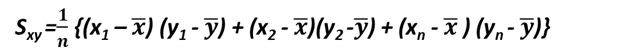

In [9]:
summary_df = scores_df.copy()
summary_df['english_deviation'] =\
    summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation'] =\
    summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product of deviations'] =\
    summary_df['english_deviation'] * summary_df['mathematics_deviation']
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [10]:
summary_df['product of deviations'].mean()

62.800

In [11]:
#Covariance matrix мөн  variance - Covariance matrix 
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [12]:
cov_mat[0, 1], cov_mat[1, 0]

(62.800000000000004, 62.800000000000004)

In [12]:
cov_mat[0, 0], cov_mat[1, 1]

(86.0, 68.44000000000001)

In [13]:
np.var(en_scores, ddof=0), np.var(ma_scores, ddof=0)

(86.0, 68.44000000000001)

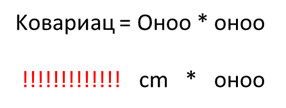

### Correlation coefficient

Корреляцийн коэффициент нь хоёр хувьсагчийн харьцангуй хөдөлгөөний хоорондын хамаарлын бат бөх байдлын статистик үзүүлэлт юм. Утга нь -1.0 хооронд 1.0 хэлбэлздэг. Тооцоолсон тоо 1.0-ээс их эсвэл -1.0-ээс бага байвал корреляцийн хэмжилтэнд алдаа гарсан гэсэн үг.

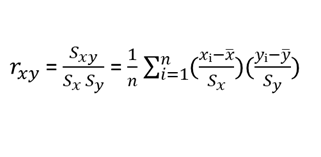
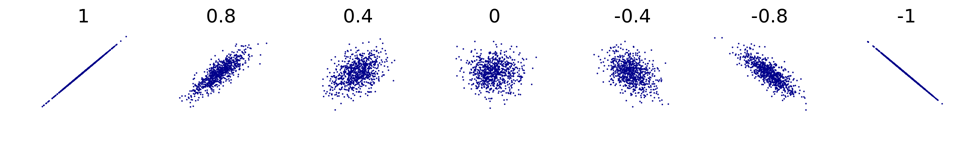

In [13]:
np.cov(en_scores, ma_scores, ddof=0)[0, 1] /\
    (np.std(en_scores) * np.std(ma_scores))

0.8185692341186713

In [16]:
np.corrcoef(en_scores, ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [15]:
scores_df.corr()

,english,mathematics
english,1.000,0.819
mathematics,0.819,1.000


## Visualization

### Scatterplot

2 хэжээст датаг дүрсжүүлэх хамгийн тохирмжтой нь

In [17]:
import matplotlib.pyplot as plt

In [18]:
df

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76
6,48,60
7,65,81
8,49,66
9,65,78


<AxesSubplot:xlabel='english', ylabel='mathematics'>

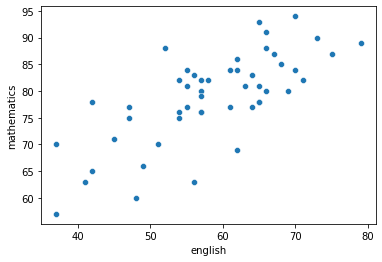

In [19]:
sns.scatterplot(data=df, x="english", y= 'mathematics')

### Regression line

2 хувьсагчийн хоорондын хамаарллыг хамгийн сайн илэрхийлдэг 

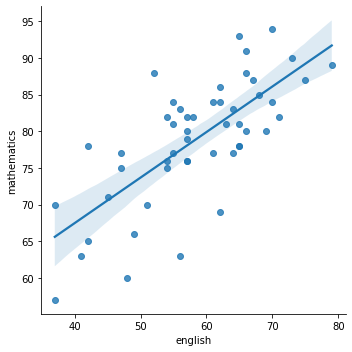

In [20]:
sns.lmplot(data=df, x="english", y= 'mathematics')

### Heat map

2 хэмжээст датаны хамааралыг өөр өөр өнгөөр ялган харуулдаг давуу талтай

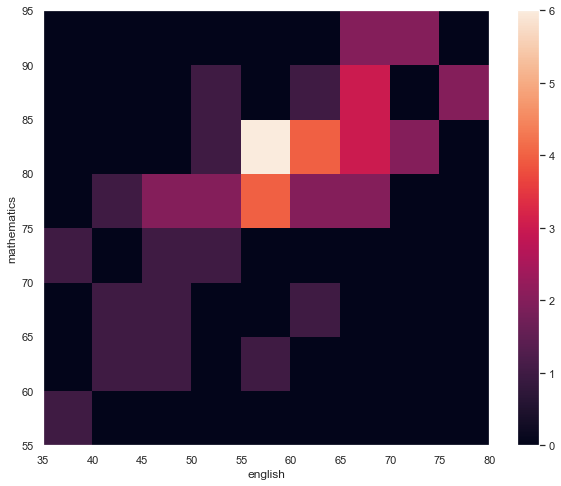

In [27]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_scores, math_scores,
              bins=[9, 8], range=[(35, 80), (55, 95)])
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3], ax=ax)
plt.show()

## Anscom's example

In [22]:
anscombe_data = np.load('data/ch3_anscombe.npy')
print(anscombe_data.shape)
anscombe_data[0]

(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

In [23]:
stats_df = pd.DataFrame(index=['X_mean', 'X_variance', 'Y_mean',
                               'Y_variance', 'X&Y_correlation',
                               'X&Y_regression line'])
for i, data in enumerate(anscombe_data):
    dataX = data[:, 0]
    dataY = data[:, 1]
    poly_fit = np.polyfit(dataX, dataY, 1)
    stats_df[f'data{i+1}'] =\
        [f'{np.mean(dataX):.2f}',
         f'{np.var(dataX):.2f}',
         f'{np.mean(dataY):.2f}',
         f'{np.var(dataY):.2f}',
         f'{np.corrcoef(dataX, dataY)[0, 1]:.2f}',
         f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x']
stats_df

,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


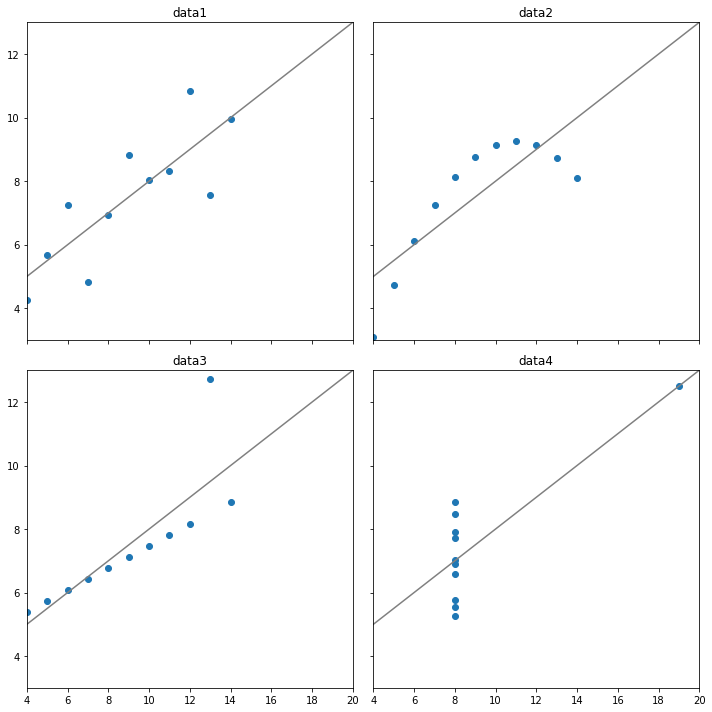

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10),
                         sharex=True, sharey=True)

xs = np.linspace(0, 30, 100)
for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:,0], data[:,1], 1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    # Зурах газрыг сонгоно
    ax = axes[i//2, i%2]
    ax.set_xlim([4, 20])
    ax.set_ylim([3, 13])
    # Гарчиг өг
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0], data[:,1])
    ax.plot(xs, ys, color='gray')

# Графикуудын хоорондын зай
plt.tight_layout()
plt.show()